# Exploratory Data Analysis (EDA) and Business Insights
### Data Science Assignment: eCommerce Transactions Dataset
Author: Saniga Babu 
Date: 27-01-2025


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\HP\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")

# Preview data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [11]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


EDA
1.Customer Distribution by Region

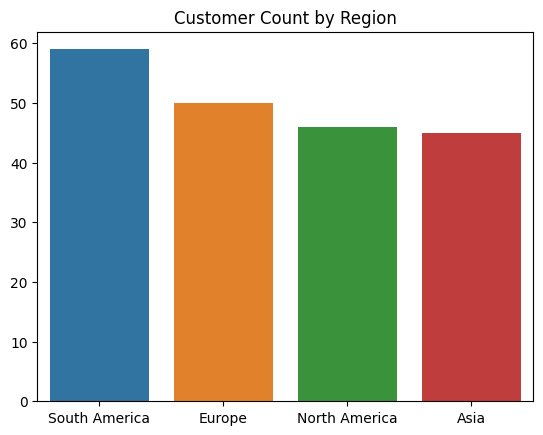

In [12]:
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer Count by Region')
plt.show()


2.Top 10 Products by Revenue

  ProductID  TotalValue               ProductName     Category   Price
0      P029    19513.80        TechPro Headphones  Electronics  433.64
1      P079    17946.91            ActiveWear Rug   Home Decor  417.37
2      P048    17905.20          TechPro Cookbook        Books  416.40
3      P020    15060.92         ActiveWear Jacket     Clothing  396.34
4      P062    14592.24           HomeSense Novel        Books  374.16
5      P059    13947.20           SoundWave Jeans     Clothing  303.20
6      P039    13778.88        TechPro Smartwatch  Electronics  430.59
7      P083    13671.60     ActiveWear Smartwatch  Electronics  455.72
8      P019    13487.95     ComfortLiving Sweater     Clothing  385.37
9      P041    13232.12  ComfortLiving Smartphone  Electronics  456.28


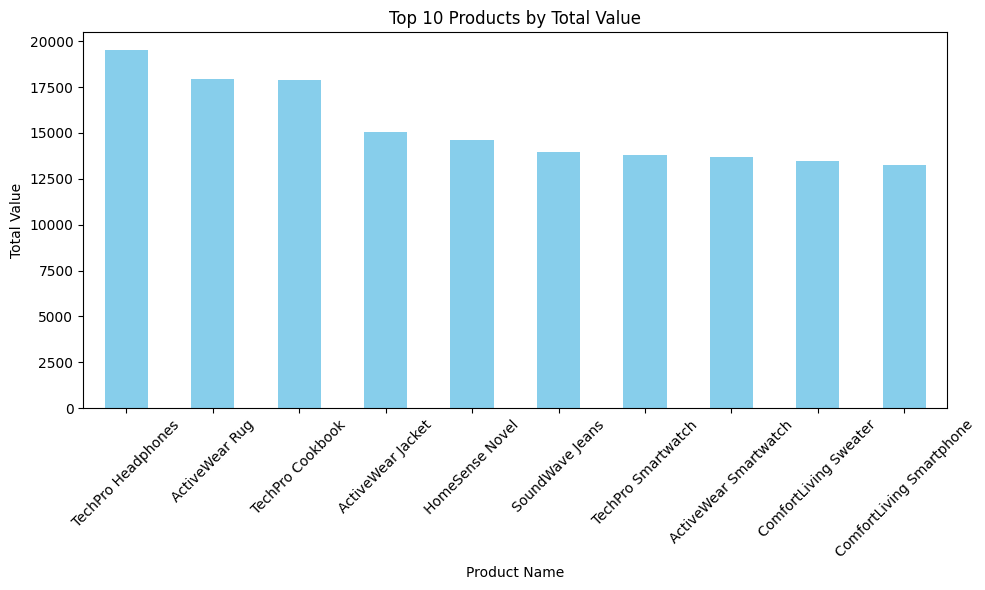

In [23]:
# Merge the top_products DataFrame with the product details to get product names
top_products_details = pd.merge(top_products, products, on='ProductID')

# Print the top products with their names
print(top_products_details)

# Plotting a bar graph with product names
plt.figure(figsize=(10, 6))
top_products_details.set_index('ProductName')['TotalValue'].plot(kind='bar', color='skyblue')


plt.title('Top 10 Products by Total Value')
plt.xlabel('Product Name')
plt.ylabel('Total Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



3.Monthly Transaction Trends

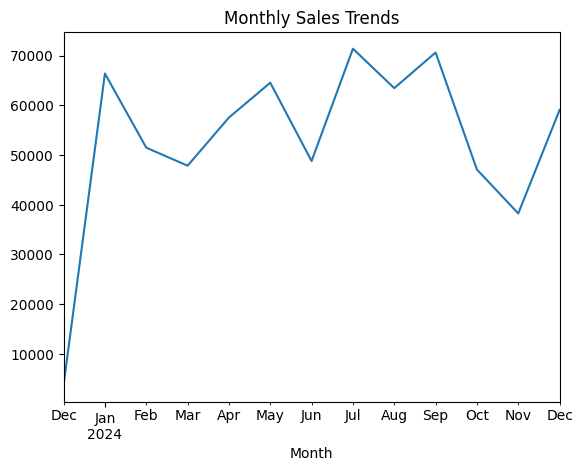

In [14]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trends')
plt.show()


4: Top Customers by Total Spending

Top 10 Customers by Total Spending:
  CustomerID  TotalValue          CustomerName
0      C0141    10673.87          Paul Parsons
1      C0054     8040.39          Bruce Rhodes
2      C0065     7663.70          Gerald Hines
3      C0156     7634.45         William Adams
4      C0082     7572.91          Aimee Taylor
5      C0188     7111.32             Anna Ball
6      C0059     7073.28  Mrs. Kimberly Wright
7      C0028     6819.57         Jennifer Pena
8      C0099     6715.72          Rodney Eaton
9      C0165     6708.10         Juan Mcdaniel


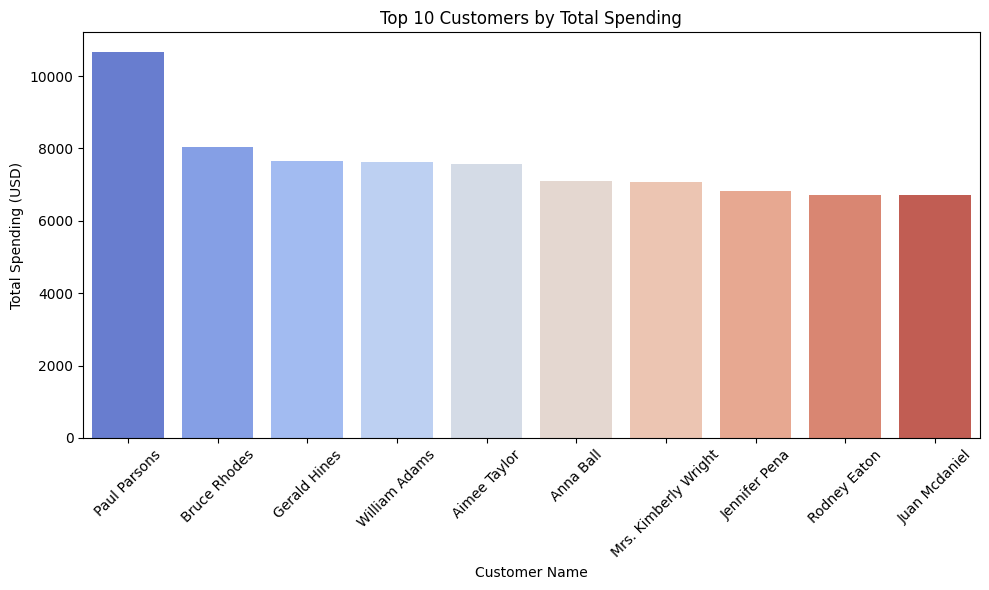

In [24]:
# Merge top_customers with customer details to get customer names
top_customers_details = pd.merge(top_customers, customers[['CustomerID', 'CustomerName']], on='CustomerID')

# Print the top customers with their names
print("Top 10 Customers by Total Spending:")
print(top_customers_details)

# Visualize the top customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_details['CustomerName'], y=top_customers_details['TotalValue'], palette='coolwarm')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5: Products with the Highest Quantity Sold

Top 10 Products by Quantity Sold:
  ProductID  Quantity            ProductName     Category   Price
0      P059        46        SoundWave Jeans     Clothing  303.20
1      P054        46     SoundWave Cookbook        Books   57.30
2      P029        45     TechPro Headphones  Electronics  433.64
3      P079        43         ActiveWear Rug   Home Decor  417.37
4      P061        43    HomeSense Desk Lamp   Home Decor  156.96
5      P057        43  ActiveWear Smartphone  Electronics  239.70
6      P048        43       TechPro Cookbook        Books  416.40
7      P062        39        HomeSense Novel        Books  374.16
8      P020        38      ActiveWear Jacket     Clothing  396.34
9      P028        38    HomeSense Desk Lamp   Home Decor  235.58


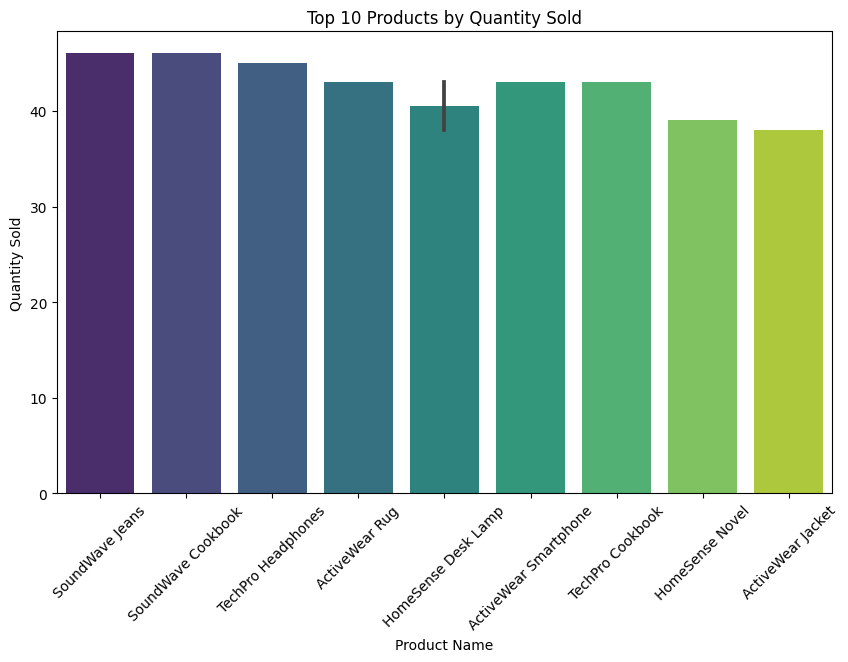

In [16]:
# Group transactions by ProductID and calculate total quantity sold
top_products_by_quantity = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

# Merge with product details to display product names
top_products_details = pd.merge(top_products_by_quantity, products, on='ProductID')

print("Top 10 Products by Quantity Sold:")
print(top_products_details)

# Visualize the top products by quantity sold
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_details['ProductName'], y=top_products_details['Quantity'], palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()
